In [11]:
import pandas as pd
df = pd.read_excel('프로그램.xlsx')
df = df.loc[df['강좌개설정보'] == 0]
df

,Unnamed: 0,프로그램명,유형,내용,강좌개설정보,구청
1,NaN,밴드체조,생활체육,"밴드를 이용하여 진행하는 체조, 강사님을 따라하는 체조로 밴드에 가하는 힘에 의하여...",0,관악구
2,NaN,탁구교실,생활체육,직사각형 나무 탁자에 네트를 걸고 양 사이드에 선수들이 서서 탁구채로 속이 빈 작은...,0,관악구
4,NaN,명상과 스트레칭,생활체육,고요히 눈을 감고 차분한 마음으로 깊이 생각하는 것이다. 명상은 일체의 '잡생각'을...,0,관악구
5,NaN,캘리그라피,문화예술가정,손으로 그린 그림 문자라는 뜻으로 글씨를 아름답게 쓰는 기술을 뜻한다. 아날로그적...,0,관악구
10,NaN,라인댄스,생활체육,여러 사람이 줄을 지어서 동일한 동작을 하는데 스포츠 댄스처럼 파트너와 짝을 짓지 ...,0,관악구
...,...,...,...,...,...,...
1784,NaN,새벽 국선도,생활체육,"전조신법 단전호흡 심신안정이완, 명상, 오장육부강화 후조신법 체형 전신 교정운동",0,강남구
1786,NaN,플라멩코(중급),생활체육,"유네스코 문화유산으로 등록된 전통 스페인무용 플라멩꼬의 노래 춤,음악적 기교가 융합...",0,강남구
1788,NaN,서예,문화예술가정,기본기를 확실히 다질수있게 줄긋기부터 중봉운필을 익히는 반복수업 기본 법청을 중심으...,0,강남구
1791,NaN,가베(놀이),문화예술가정,가베 교구를 활용한 수학적 사고와 창의력을 가진 미래인재 양성,0,강남구


In [12]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import itertools
from bs4 import BeautifulSoup
import re

def preprocess_text(text, stop_words):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", text)
    words = text.split()
    words = [w for w in words if not w in stop_words]
    clean_text = ' '.join(words)
    return clean_text

if __name__=='__main__':
    df = pd.read_excel('프로그램.xlsx')
    # '내용' 열에서 NaN 값을 제거합니다.
    df = df.dropna(subset=['내용'])

    # 한국어 불용어 리스트
    stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한', '및', '수', '등',
                      '하다', '대한', '있다', '과', '으로', '에 대한', '에 대해', '을 통한', '등을', '그', '즉', '흥미와', '때문에',
                      '이리저리', '그', '학습하여', '얼핏','합니다','통해', '있는', '될', '활용할', '자신의', '그리고', '한다', '간단한', '맞추어'])

    # 각 문서에서 단어 추출 및 단어 쌍의 빈도수 계산
    word_pair_counter = Counter()
    for content in tqdm(df['내용'], desc='단어쌍 만들기'):
        clean_content = preprocess_text(content, stop_words)
        words = clean_content.split()
        for word1, word2 in itertools.combinations(words, 2):
            if word1 != word2:
                word_pair_counter[(word1, word2)] += 1

    # 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
    count_list = [{'word1': w1, 'word2': w2, 'freq': freq} for (w1, w2), freq in word_pair_counter.items()]
    df_word_pairs = pd.DataFrame(count_list)
    df_word_pairs = df_word_pairs.sort_values(by='freq', ascending=False)
    df_word_pairs = df_word_pairs.reset_index(drop=True)

    # 결과 저장
    df_word_pairs.to_csv('word_pairs.csv', encoding='utf-8-sig')

단어쌍 만들기:   0%|          | 0/1799 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_3160\456138527.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
단어쌍 만들기: 100%|██████████| 1799/1799 [00:00<00:00, 5956.44it/s]


In [13]:
df = pd.read_csv('word_pairs.csv', encoding='utf-8-sig')
df

,Unnamed: 0,word1,word2,freq
0,0,사진,만들기,62
1,1,스마트폰,앱,45
2,2,누구나,쉽게,38
3,3,앱,만들기,35
4,4,자유형,배영,33
...,...,...,...,...
277678,277678,알아차리고,서로를,1
277679,277679,알아차리고,알아가며,1
277680,277680,알아차리고,협력하는,1
277681,277681,알아차리고,힘을,1


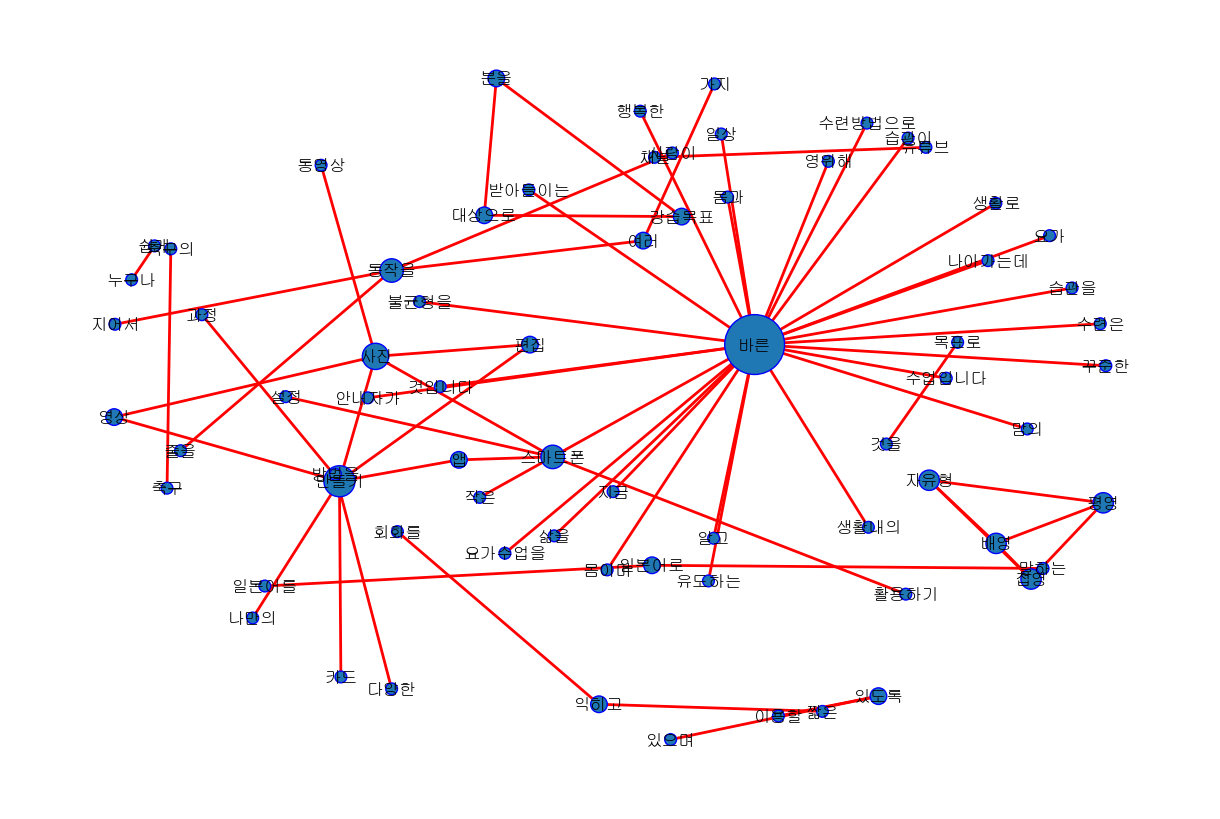

In [14]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud

if __name__ == '__main__':
    # 단어쌍 동시출현 빈도수를 담았던 word_pairs.csv파일
    dataset = pd.read_csv('word_pairs.csv')

    # 중심성 척도 계산을 위한 Graph를 만든다.
    G_centrality = nx.Graph()
    G = nx.Graph()

    # 빈도수가 10 이상인 단어쌍에 대해서만 edge(간선)을 표현한다.
    for ind, row in dataset[dataset['freq'] >= 20].iterrows():
        G_centrality.add_edge(row['word1'], row['word2'], weight=int(row['freq']))
        G.add_edge(row['word1'], row['word2'], weight=int(row['freq']))

    # 중심성 계산
    dgr = nx.degree_centrality(G_centrality)
    for node, centrality in dgr.items():
        G.add_node(node, nodesize=centrality * 5000)

    # 노드 크기 조정
    sizes = [G.nodes[node]['nodesize'] for node in G]


    options = {
        'edge_color': 'red',
        'width': 2,
        'with_labels': True,
        'font_weight': 'regular',
    }
    font_fname ='C:\Windows\Fonts\gulim.ttc'
    # 폰트 설정
    fontprop = fm.FontProperties(fname=font_fname, size=15)

    # 그래프 그리기
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=6, iterations=200)
    nx.draw(G, pos, node_size=sizes, **options, font_family=fontprop.get_name())
    ax = plt.gca()
    if ax.collections:
        ax.collections[0].set_edgecolor('blue')
    plt.show()

In [15]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import itertools
from bs4 import BeautifulSoup
import re

def preprocess_text(text, stop_words):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", text)
    words = text.split()
    words = [w for w in words if not w in stop_words]
    clean_text = ' '.join(words)
    return clean_text

if __name__=='__main__':
    df = pd.read_excel('프로그램.xlsx')
    df = df.loc[df['강좌개설정보'] == 0]
    # '내용' 열에서 NaN 값을 제거합니다.
    df = df.dropna(subset=['내용'])

    # 한국어 불용어 리스트
    stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한', '및', '수', '등',
                      '하다', '대한', '있다', '과', '으로', '에 대한', '에 대해', '을 통한', '등을', '그', '즉', '흥미와', '때문에',
                      '이리저리', '그', '학습하여', '얼핏','합니다','통해', '있는', '될', '활용할', '자신의', '그리고', '한다', '간단한', '맞추어',
                      '아니하고', '하는데', '사람이', '동일한', '있도록'])

    # 각 문서에서 단어 추출 및 단어 쌍의 빈도수 계산
    word_pair_counter = Counter()
    for content in tqdm(df['내용'], desc='단어쌍 만들기'):
        clean_content = preprocess_text(content, stop_words)
        words = clean_content.split()
        for word1, word2 in itertools.combinations(words, 2):
            if word1 != word2:
                word_pair_counter[(word1, word2)] += 1

    # 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
    count_list = [{'word1': w1, 'word2': w2, 'freq': freq} for (w1, w2), freq in word_pair_counter.items()]
    df_word_pairs = pd.DataFrame(count_list)
    df_word_pairs = df_word_pairs.sort_values(by='freq', ascending=False)
    df_word_pairs = df_word_pairs.reset_index(drop=True)

    # 결과 저장
    df_word_pairs.to_csv('word_pairs_0.csv', encoding='utf-8-sig')

단어쌍 만들기:   0%|          | 0/892 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_3160\114561554.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
단어쌍 만들기: 100%|██████████| 892/892 [00:00<00:00, 5405.94it/s]


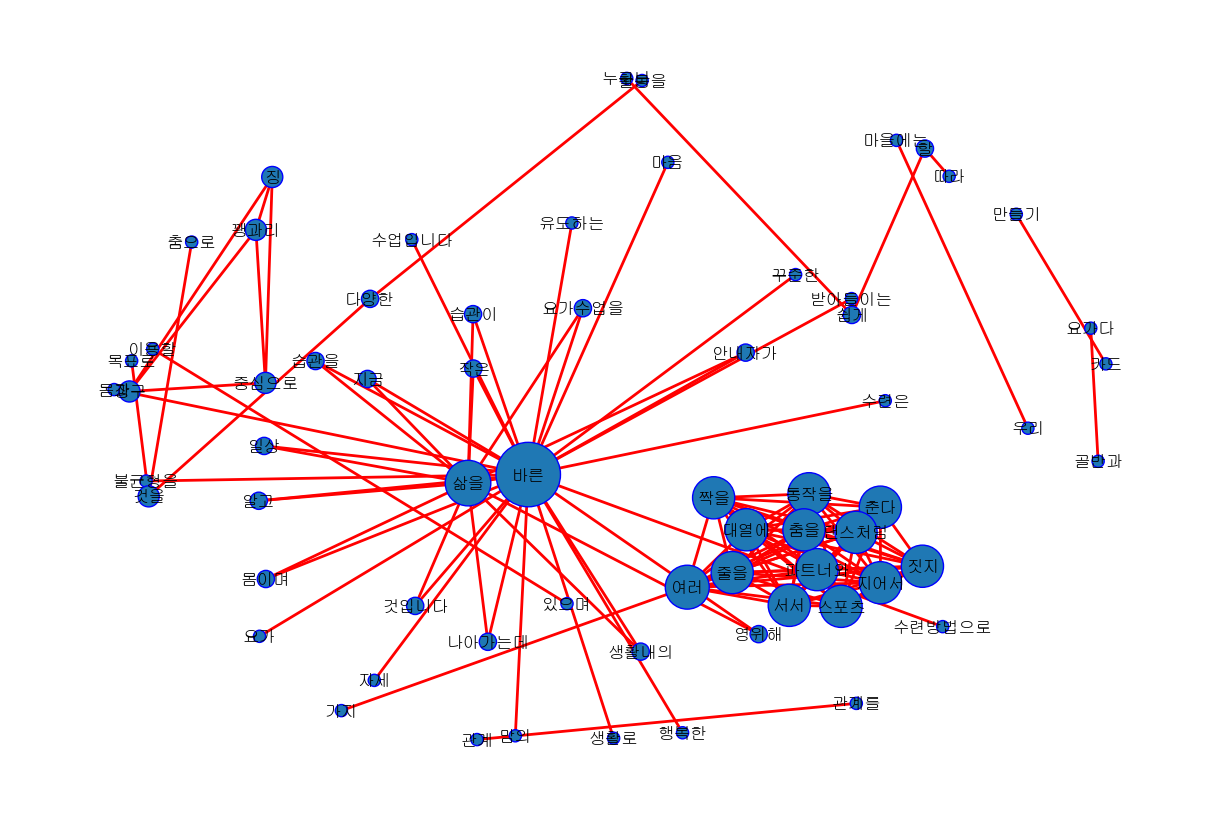

In [16]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud

if __name__ == '__main__':
    # 단어쌍 동시출현 빈도수를 담았던 word_pairs.csv파일
    dataset = pd.read_csv('word_pairs_0.csv')

    # 중심성 척도 계산을 위한 Graph를 만든다.
    G_centrality = nx.Graph()
    G = nx.Graph()

    # 빈도수가 10 이상인 단어쌍에 대해서만 edge(간선)을 표현한다.
    for ind, row in dataset[dataset['freq'] >= 15].iterrows():
        G_centrality.add_edge(row['word1'], row['word2'], weight=int(row['freq']))
        G.add_edge(row['word1'], row['word2'], weight=int(row['freq']))

    # 중심성 계산
    dgr = nx.degree_centrality(G_centrality)
    for node, centrality in dgr.items():
        G.add_node(node, nodesize=centrality * 5000)

    # 노드 크기 조정
    sizes = [G.nodes[node]['nodesize'] for node in G]


    options = {
        'edge_color': 'red',
        'width': 2,
        'with_labels': True,
        'font_weight': 'regular',
    }
    font_fname ='C:\Windows\Fonts\gulim.ttc'
    # 폰트 설정
    fontprop = fm.FontProperties(fname=font_fname, size=13)

    # 그래프 그리기
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=7, iterations=200)
    nx.draw(G, pos, node_size=sizes, **options, font_family=fontprop.get_name())
    ax = plt.gca()
    if ax.collections:
        ax.collections[0].set_edgecolor('blue')
    plt.show()

In [17]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import itertools
from bs4 import BeautifulSoup
import re

def preprocess_text(text, stop_words):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", text)
    words = text.split()
    words = [w for w in words if not w in stop_words]
    clean_text = ' '.join(words)
    return clean_text

if __name__=='__main__':
    df = pd.read_excel('프로그램.xlsx')
    df = df.loc[df['강좌개설정보'] == 1]
    # '내용' 열에서 NaN 값을 제거합니다.
    df = df.dropna(subset=['내용'])

    # 한국어 불용어 리스트
    stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한', '및', '수', '등',
                      '하다', '대한', '있다', '과', '으로', '에 대한', '에 대해', '을 통한', '등을', '그', '즉', '흥미와', '때문에','방법을',
                      '이리저리', '그', '학습하여', '얼핏','합니다','통해', '있는', '될', '활용할', '자신의', '그리고', '한다', '간단한', '맞추어',
                      '아니하고', '하는데', '사람이', '동일한', '있도록', '익히고', '물', '말하는', '짧은', '프로그램을', '배우고', '강습목표', '개인별', '대상으로'])

    # 각 문서에서 단어 추출 및 단어 쌍의 빈도수 계산
    word_pair_counter = Counter()
    for content in tqdm(df['내용'], desc='단어쌍 만들기'):
        clean_content = preprocess_text(content, stop_words)
        words = clean_content.split()
        for word1, word2 in itertools.combinations(words, 2):
            if word1 != word2:
                word_pair_counter[(word1, word2)] += 1

    # 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
    count_list = [{'word1': w1, 'word2': w2, 'freq': freq} for (w1, w2), freq in word_pair_counter.items()]
    df_word_pairs = pd.DataFrame(count_list)
    df_word_pairs = df_word_pairs.sort_values(by='freq', ascending=False)
    df_word_pairs = df_word_pairs.reset_index(drop=True)

    # 결과 저장
    df_word_pairs.to_csv('word_pairs_1.csv', encoding='utf-8-sig')

단어쌍 만들기:   0%|          | 0/907 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_3160\3414746682.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
단어쌍 만들기: 100%|██████████| 907/907 [00:00<00:00, 6923.74it/s]


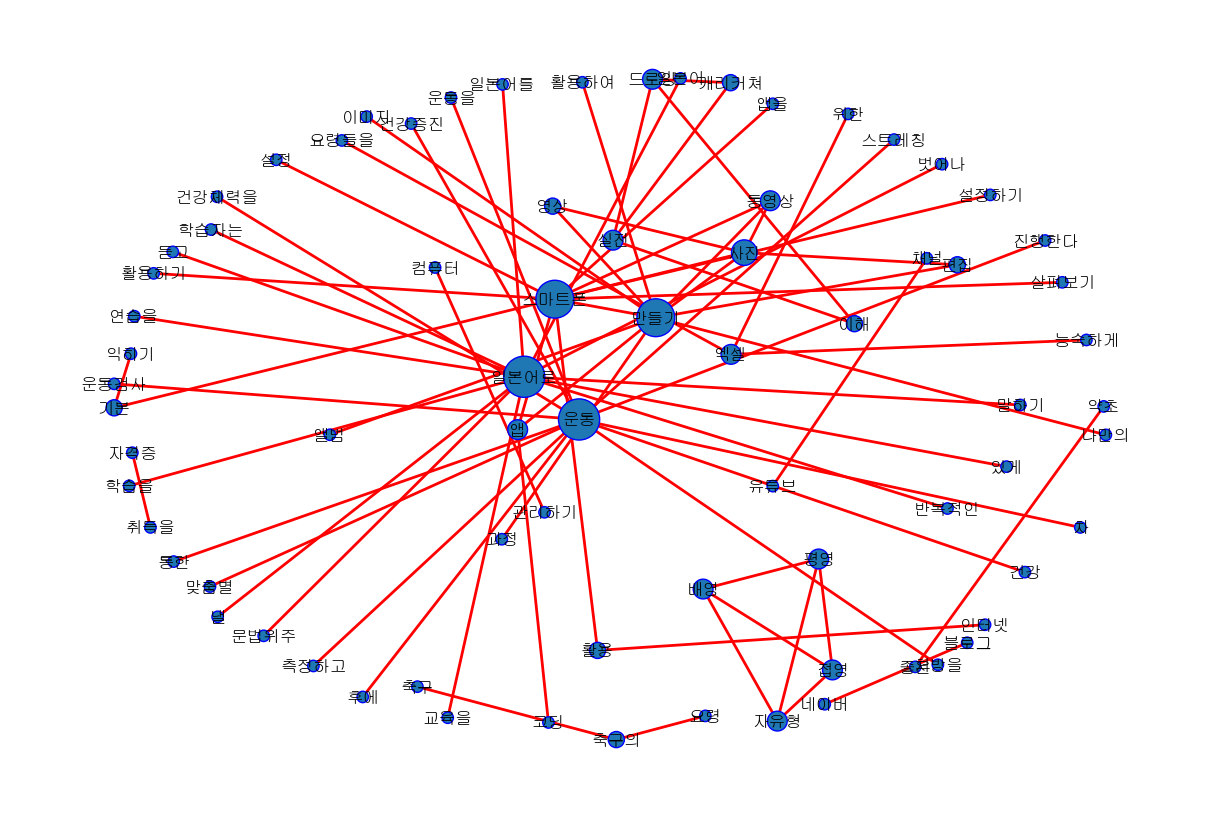

In [18]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud

if __name__ == '__main__':
    # 단어쌍 동시출현 빈도수를 담았던 word_pairs.csv파일
    dataset = pd.read_csv('word_pairs_1.csv')

    # 중심성 척도 계산을 위한 Graph를 만든다.
    G_centrality = nx.Graph()
    G = nx.Graph()

    # 빈도수가 10 이상인 단어쌍에 대해서만 edge(간선)을 표현한다.
    for ind, row in dataset[dataset['freq'] >= 15].iterrows():
        G_centrality.add_edge(row['word1'], row['word2'], weight=int(row['freq']))
        G.add_edge(row['word1'], row['word2'], weight=int(row['freq']))

    # 중심성 계산
    dgr = nx.degree_centrality(G_centrality)
    for node, centrality in dgr.items():
        G.add_node(node, nodesize=centrality * 5000)

    # 노드 크기 조정
    sizes = [G.nodes[node]['nodesize'] for node in G]


    options = {
        'edge_color': 'red',
        'width': 2,
        'with_labels': True,
        'font_weight': 'regular',
    }
    font_fname ='C:\Windows\Fonts\gulim.ttc'
    # 폰트 설정
    fontprop = fm.FontProperties(fname=font_fname, size=13)

    # 그래프 그리기
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=7, iterations=200)
    nx.draw(G, pos, node_size=sizes, **options, font_family=fontprop.get_name())
    ax = plt.gca()
    if ax.collections:
        ax.collections[0].set_edgecolor('blue')
    plt.show()